<a href="https://colab.research.google.com/github/lmartins30/SENAC-SP/blob/main/Proj2_Ataq_Coracao_Senac_SJRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook desenvolvido por alunos no curso de pós graduação em Inteligência Artificial no SENAC-SP, tendo como base o texto do autor Aurélien Géron.

# Prevenção de ataques cardíacos

## 1.Preparando do ambiente

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn import preprocessing


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 2.Abrindo o Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
# Dataset is now stored in a Pandas Dataframe

## 3.Estrutura dos Dados

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


As colunas são referentes à:

1. Idade
2. Sexo
3. Dor no peito
4. Pressão sanguínea repouso
5. Colesterol sérico (mg/ml)
6. Açúcar sangue jejum > 120mg/dl
7. ECG repouso
8. Frequência cardíaca máxima
9. Angina induzida por exercício
10. pico antigo
11. Inclinação ECG
12. Número vasos principais problemáticos
13. thal
14. Alvo


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isna().value_counts()

age    sex    cp     trestbps  chol   fbs    restecg  thalach  exang  oldpeak  slope  ca     thal   target
False  False  False  False     False  False  False    False    False  False    False  False  False  False     303
dtype: int64

## 4.Análise dos dados

### Histogramas

Saving figure attribute_histogram_plots


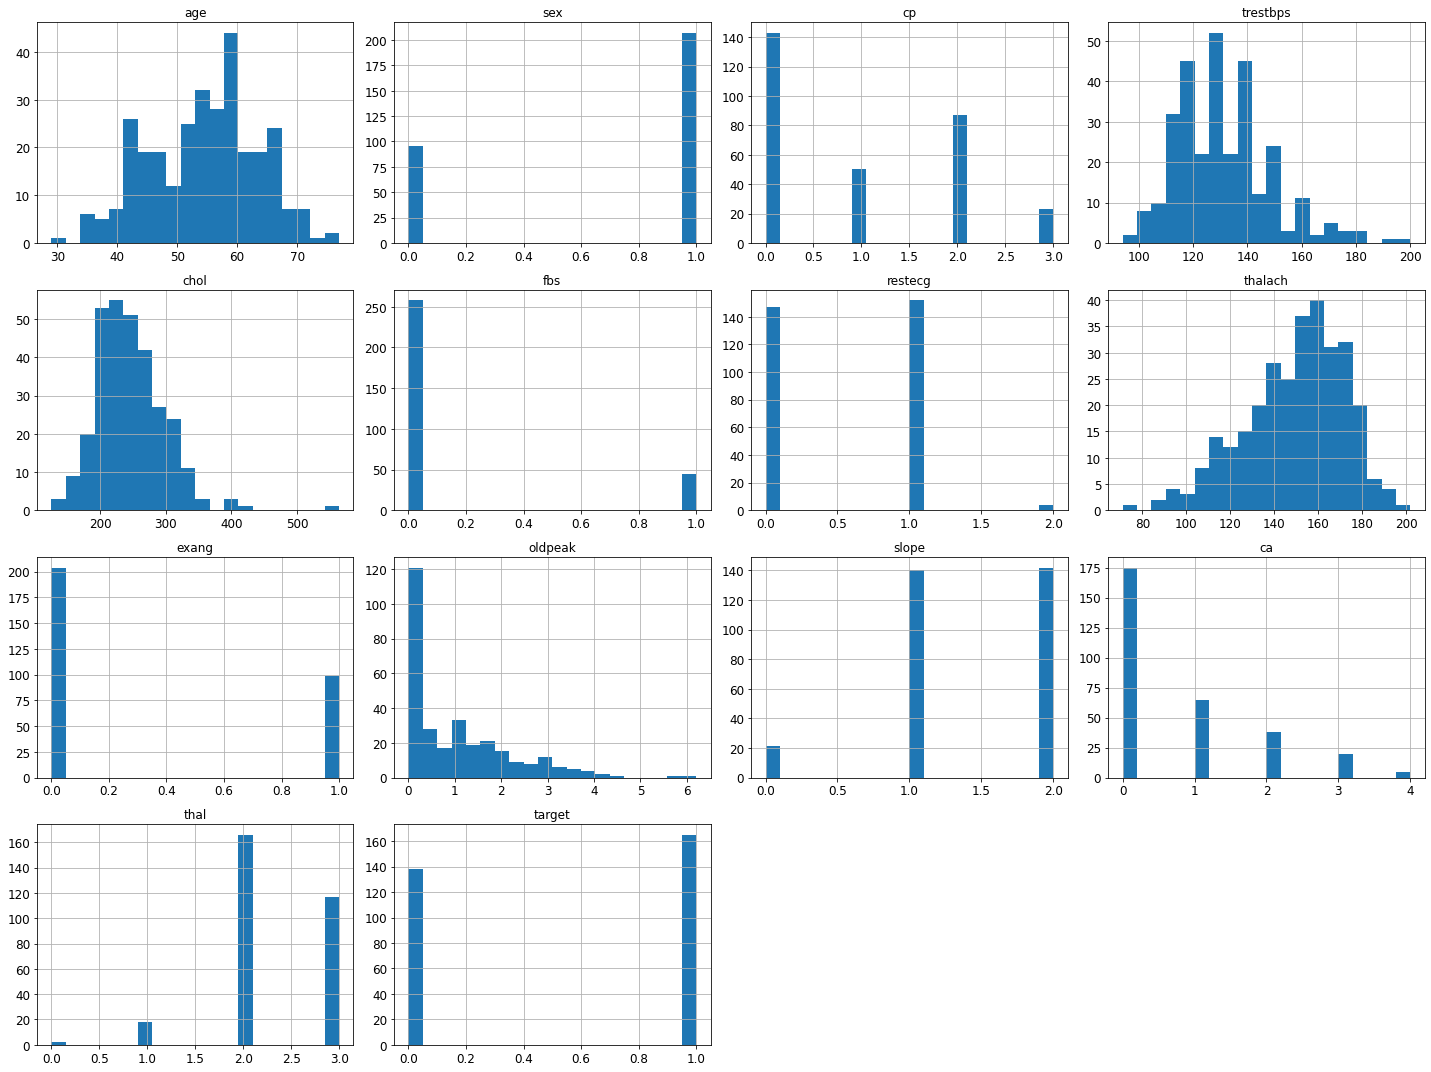

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

Pelos histogramas acima, vemos que alguma variáveis são categóricas embora sejam int ou float em sua entrada. A dummificação será feita agora, assim como a transformação da target para binária.

## Boxplot

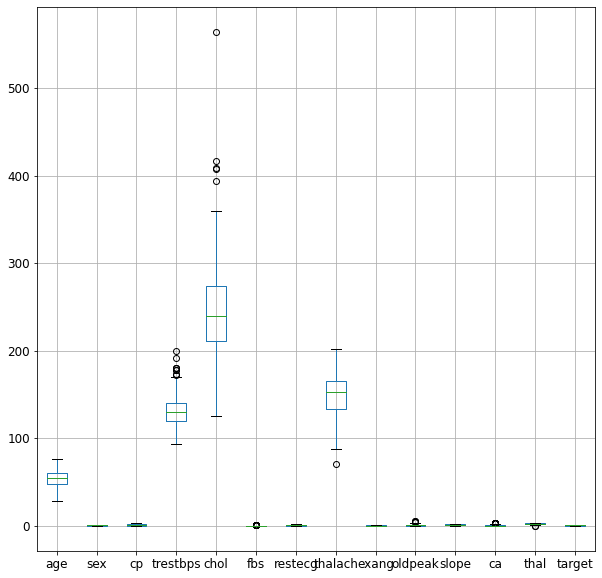

In [ ]:
df.boxplot(figsize=(10,10))

In [ ]:
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_norm = pd.DataFrame(x_scaled)

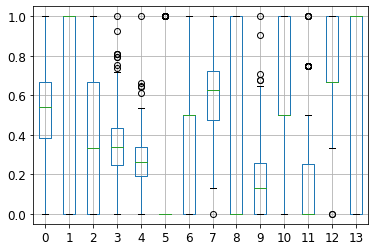

In [ ]:
df_norm.boxplot()



### Dummificação e ajuste dos tipos das variáveis



In [ ]:
df_num = pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'],drop_first=True)

In [ ]:
target = df_num['target'].astype('category')

In [ ]:
target_df = pd.DataFrame({'target': target})

In [ ]:
df_num.head(2)

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


### Correlações

In [ ]:
corr_matrix = df.corr()
corr_matrix_num = df_num.corr()

In [ ]:
corr_matrix["target"].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [ ]:
corr_matrix_num["target"].sort_values(ascending=False)

target       1.000000
thal_2       0.527334
thalach      0.421741
slope_2      0.394066
cp_2         0.316742
cp_1         0.245879
restecg_1    0.175322
cp_3         0.086957
ca_4         0.066441
fbs_1       -0.028046
restecg_2   -0.068410
chol        -0.085239
thal_1      -0.106589
trestbps    -0.144931
ca_3        -0.210615
age         -0.225439
ca_1        -0.232412
ca_2        -0.273998
sex_1       -0.280937
slope_1     -0.362053
oldpeak     -0.430696
exang_1     -0.436757
thal_3      -0.486112
Name: target, dtype: float64

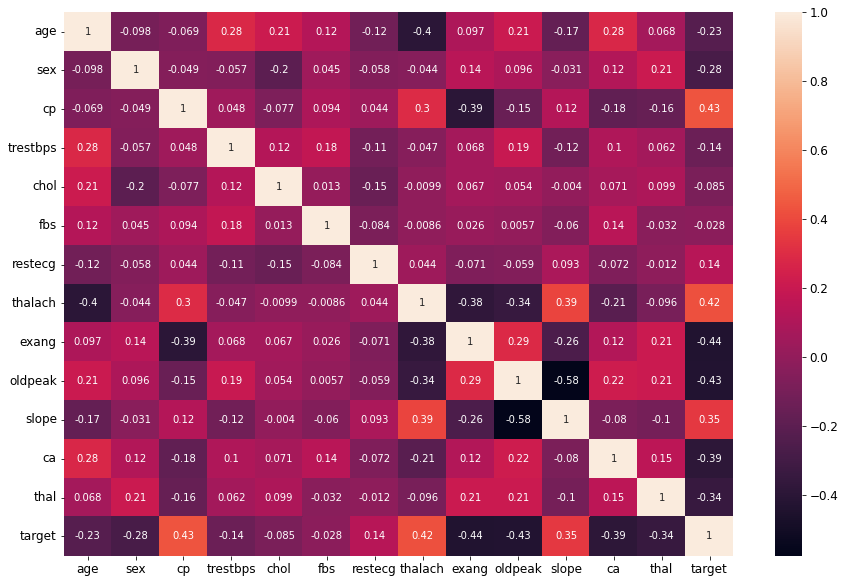

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(corr_matrix,annot=True)

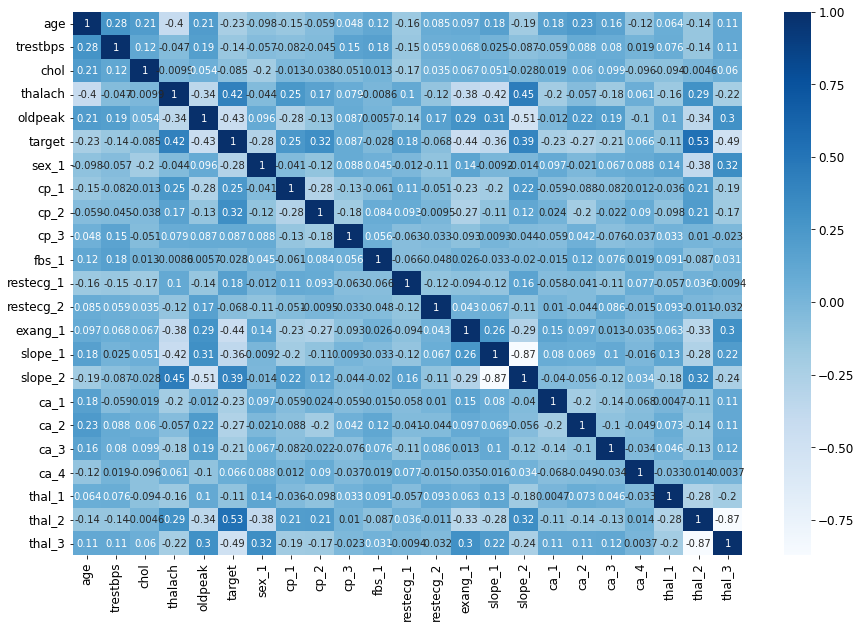

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(corr_matrix_num,annot=True, cmap='Blues')

### Dispersão

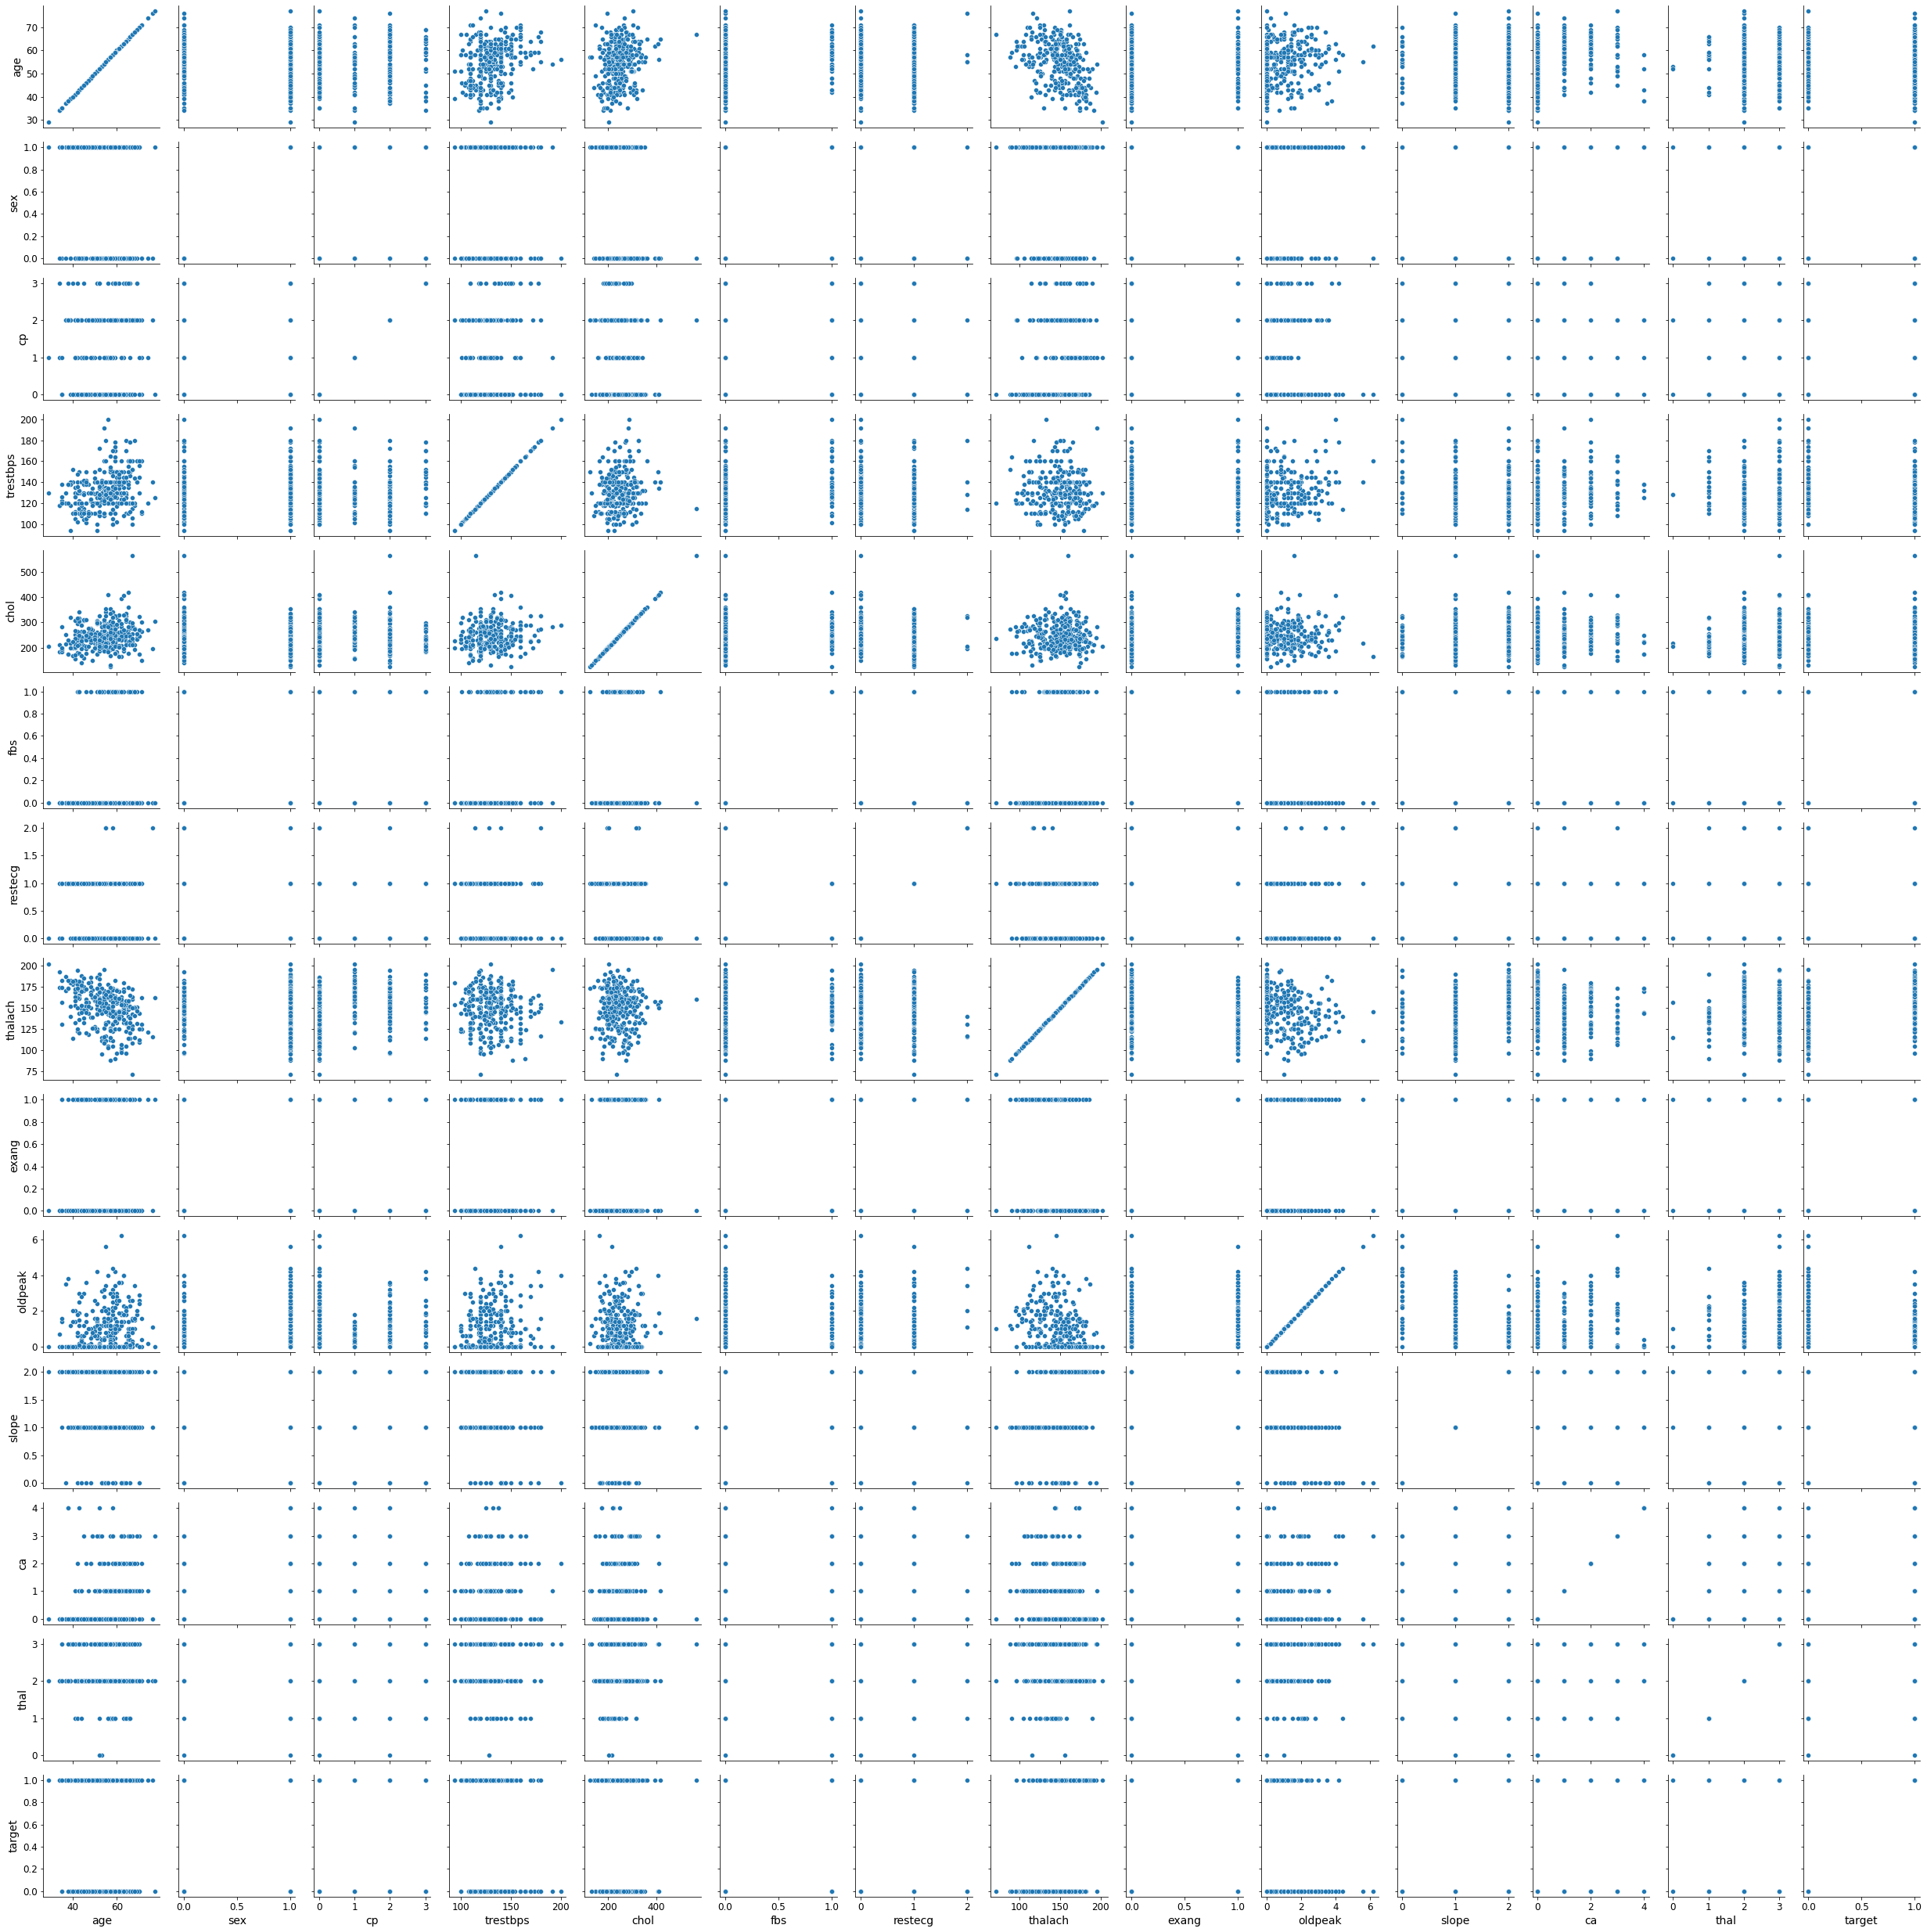

In [ ]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)

## 5.Pré-processamento dos dados

* Validação cruzada
* Scaling

Lembrando que o processo de dummyficação e categorização foram feitos acima

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(df_num.drop(columns='target'), target_df, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

## 6.Criação dos modelos

Começando por Machine Learning e posteriormente Deep Learning


### Random Forest

O primeiro modelo de ML que será testado

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
rf.fit(X_train_full, y_train_full)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(n_jobs=-1, random_state=42)

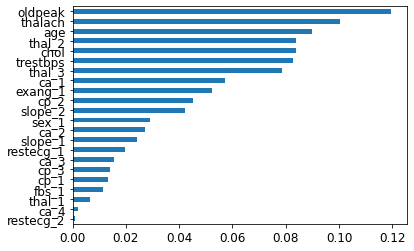

In [ ]:
pd.Series(rf.feature_importances_, index=X_train_full.columns).sort_values().plot(kind='barh');

### SVM - Support Vector Machine
 
 Outro modelo que também será testado

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC()

In [ ]:
svm.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Rede Neural

Melhor resultado de rede obtido. Outras redes foram testadas com alteração de diversos parâmetros, inclusive camadas de DropOut que não tiverem o resultado desejado.

In [ ]:
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(80, activation="relu"))
model.add(keras.layers.Dense(40, activation="relu"))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(2, activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=75,
                    validation_data=(X_valid, y_valid))

Epoch 1/75
6/6 [==============================] - 1s 40ms/step - loss: 0.7299 - accuracy: 0.4941 - val_loss: 0.7345 - val_accuracy: 0.4737
Epoch 2/75
6/6 [==============================] - 0s 8ms/step - loss: 0.7014 - accuracy: 0.5235 - val_loss: 0.7044 - val_accuracy: 0.4737
Epoch 3/75
6/6 [==============================] - 0s 7ms/step - loss: 0.6746 - accuracy: 0.5647 - val_loss: 0.6755 - val_accuracy: 0.5439
Epoch 4/75
6/6 [==============================] - 0s 10ms/step - loss: 0.6494 - accuracy: 0.6176 - val_loss: 0.6475 - val_accuracy: 0.6140
Epoch 5/75
6/6 [==============================] - 0s 7ms/step - loss: 0.6251 - accuracy: 0.7000 - val_loss: 0.6250 - val_accuracy: 0.6491
Epoch 6/75
6/6 [==============================] - 0s 7ms/step - loss: 0.6056 - accuracy: 0.7235 - val_loss: 0.6016 - val_accuracy: 0.7544
Epoch 7/75
6/6 [==============================] - 0s 7ms/step - loss: 0.5864 - accuracy: 0.7824 - val_loss: 0.5830 - val_accuracy: 0.8246
Epoch 8/75
6/6 [================

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 22)                0         
                                                                 
 dense_52 (Dense)            (None, 80)                1840      
                                                                 
 dense_53 (Dense)            (None, 40)                3240      
                                                                 
 dense_54 (Dense)            (None, 20)                820       
                                                                 
 dense_55 (Dense)            (None, 2)                 42        
                                                                 
Total params: 5,942
Trainable params: 5,942
Non-trainable params: 0
_________________________________________________________________


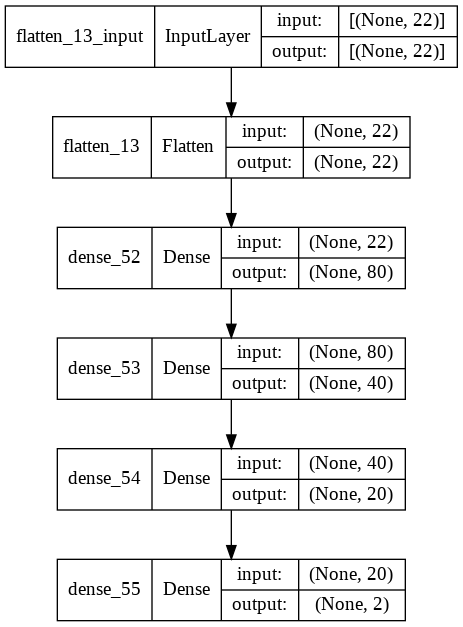

In [ ]:
keras.utils.plot_model(model, "Func.png", show_shapes=True)

## 7.Resultados

Utilizamos matriz de confusão e seus relatórios, assim como a curva ROC

### Random Forest

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


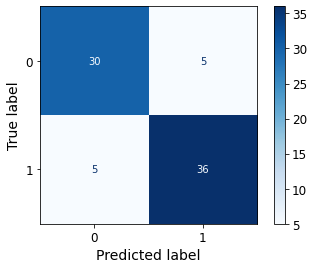

In [ ]:
plot_confusion_matrix(rf, X_test, y_test, cmap='Blues');

In [ ]:
y_pred_rf = rf.predict(X_test)
print('Random Forest')
print(classification_report(y_test, y_pred_rf))

Random Forest
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        35
           1       0.88      0.88      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


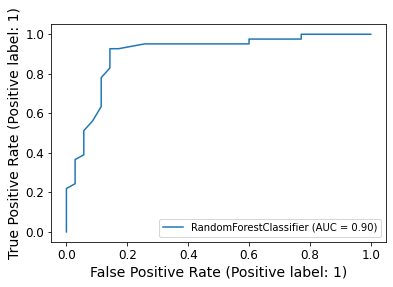

In [ ]:
rf_disp = plot_roc_curve(rf, X_test, y_test)
plt.show()

### SVM

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


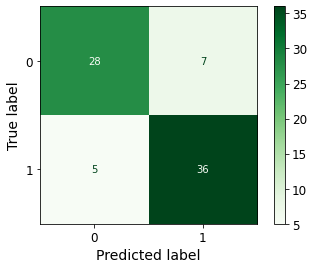

In [ ]:
plot_confusion_matrix(svm, X_test, y_test, cmap='Greens');

In [ ]:
y_pred_svm = svm.predict(X_test)
print('SVM')
print(classification_report(y_test, y_pred_svm))

SVM
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        35
           1       0.84      0.88      0.86        41

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


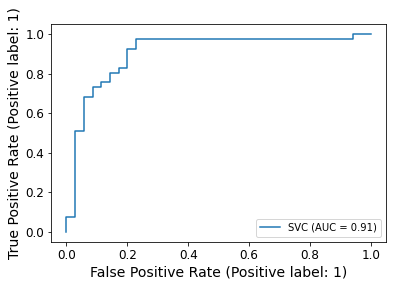

In [ ]:
svm_disp = plot_roc_curve(svm, X_test, y_test)
plt.show()

### Rede Neural

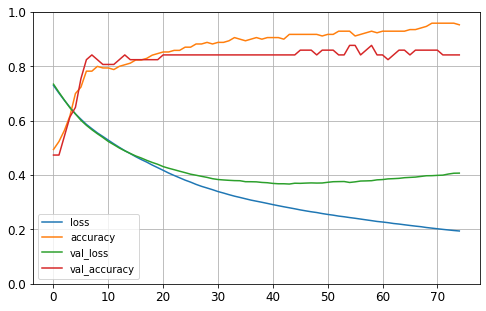

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
# save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.4057 - accuracy: 0.8421


[0.40573811531066895, 0.8421052694320679]